In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stationary_csv = "../experimental_data/2023_02_03_17_12_24.csv"
stationary = pd.read_csv(stationary_csv)

stationary

,sensor,time,x,y,z
0,BACK,1.675444e+09,-0.554439,1.010686,1.724274
1,FINGER,1.675444e+09,-1.406993,-0.180918,1.170224
2,WRIST,1.675444e+09,0.177107,0.045199,0.006139
3,BACK,1.675444e+09,-0.590338,0.940245,1.702744
4,FINGER,1.675444e+09,-1.411339,-0.181960,1.167004
...,...,...,...,...,...
6902,BACK,1.675445e+09,-0.021781,-0.201144,-0.004978
6903,FINGER,1.675445e+09,-1.489365,-0.200097,1.029872
6904,WRIST,1.675445e+09,0.182555,0.047722,0.003700
6905,BACK,1.675445e+09,-0.025308,-0.204842,-0.019580


In [4]:

# Extract the measurements from each sensor into their own dataframe
sensors = stationary["sensor"].unique()
sensor_index_df = stationary.set_index("sensor")
sensor_dfs = []

for sensor in sensors:
    df = sensor_index_df[ sensor_index_df.index.get_level_values('sensor') == sensor]
    min_time = df["time"].min()
    df["time"] = df["time"] - min_time
    sensor_dfs.append(df.sort_values(by=['time']))

/var/folders/l7/0v7vygts1xz4vxfwnxq3c8680000gn/T/ipykernel_65181/3500419483.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = df["time"] - min_time


In [5]:

for df in sensor_dfs:
    print(df.index[0].capitalize(),"sensor","summary statistics:")
    print("Variance in X:", df["x"].var() ,"meters mean:", df["x"].mean(), "meters")
    print("Variance in Y:", df["y"].var(), "meters mean:", df["y"].mean(), "meters")
    print("Variance in Z:", df["z"].var(), "meters mean:", df["z"].mean(), "meters", end="\n\n")

Back sensor summary statistics:
Variance in X: 0.002485859634095731 meters mean: -0.02249679137415507 meters
Variance in Y: 0.009568365422997105 meters mean: -0.2178095204787625 meters
Variance in Z: 0.03999354729200052 meters mean: -0.041798356354182394 meters

Finger sensor summary statistics:
Variance in X: 0.0018285573265973579 meters mean: -1.4630303713118984 meters
Variance in Y: 0.00045317913650282115 meters mean: -0.19426435399420408 meters
Variance in Z: 0.003935928667193837 meters mean: 1.0715473359220193 meters

Wrist sensor summary statistics:
Variance in X: 1.767961461900181e-05 meters mean: 0.17799032821306243 meters
Variance in Y: 1.5920653141894576e-05 meters mean: 0.045651360495027306 meters
Variance in Z: 1.735307520507252e-05 meters mean: 0.004679299128837675 meters



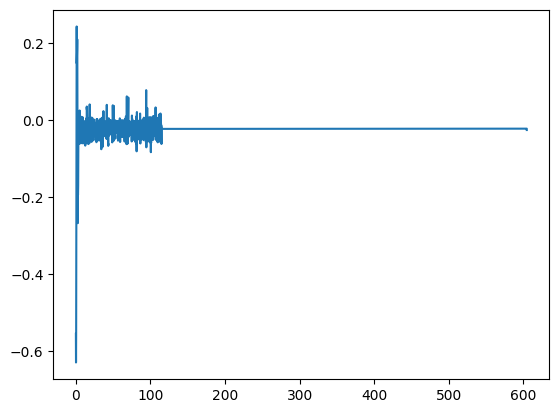

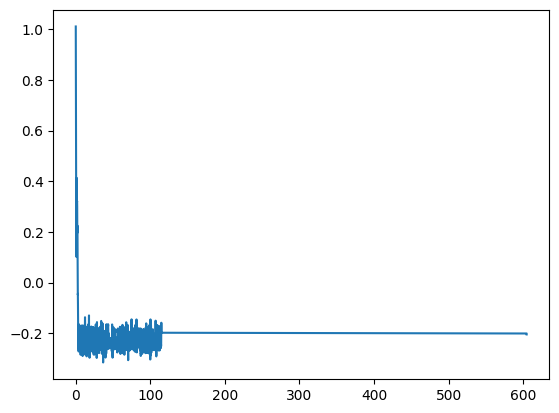

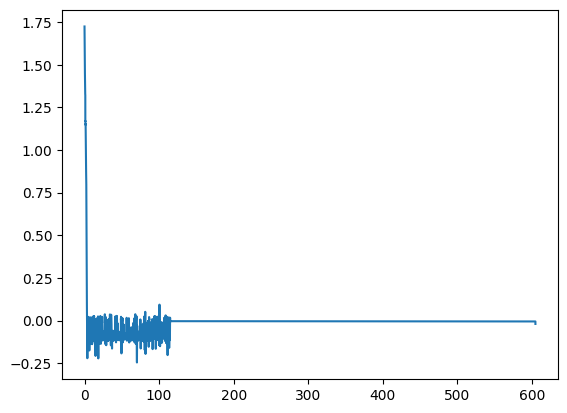

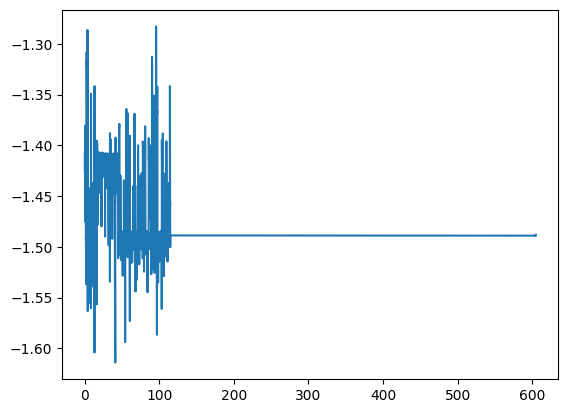

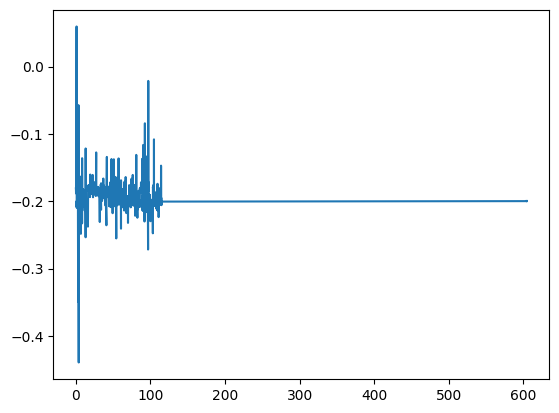

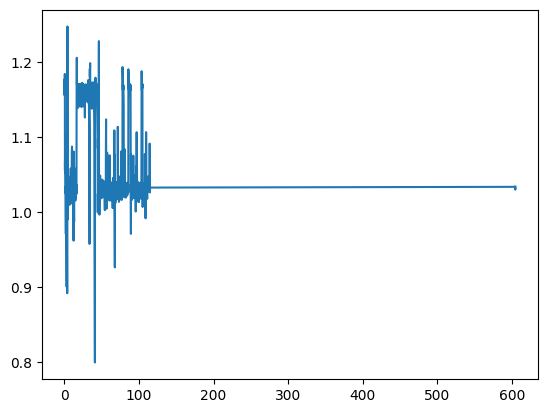

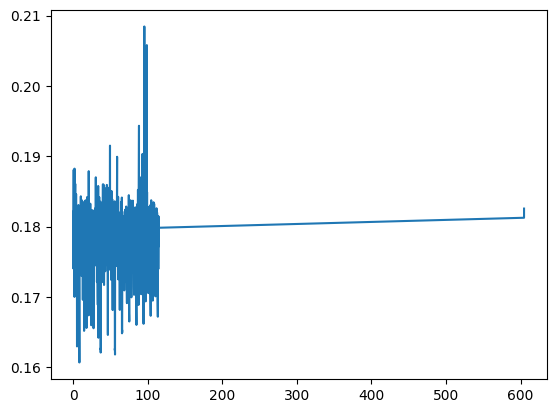

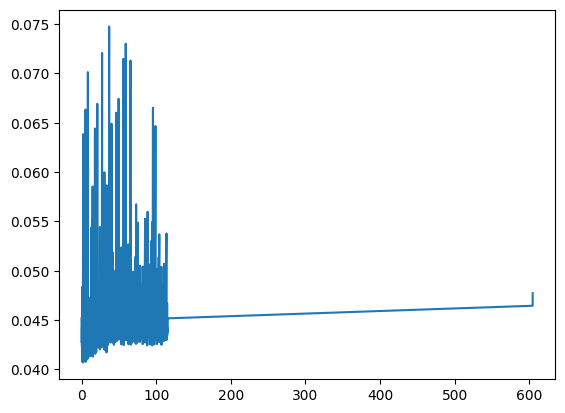

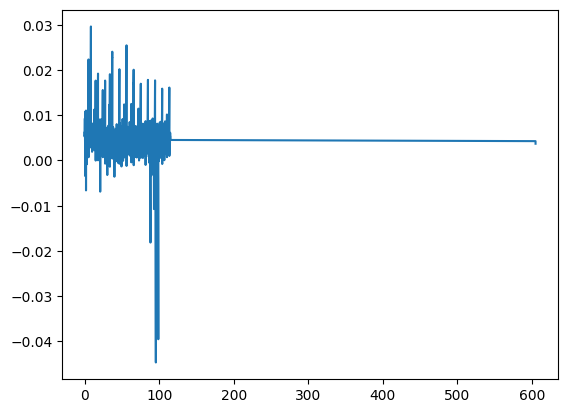

In [6]:
for sensor in sensor_dfs:
    plt.figure()
    plt.plot(sensor["time"], sensor["x"], label=sensor.index[0].capitalize() + " X")
    plt.figure()
    plt.plot(sensor["time"], sensor["y"], label=sensor.index[0].capitalize() + " Y")
    plt.figure()
    plt.plot(sensor["time"], sensor["z"], label=sensor.index[0].capitalize() + " Z")

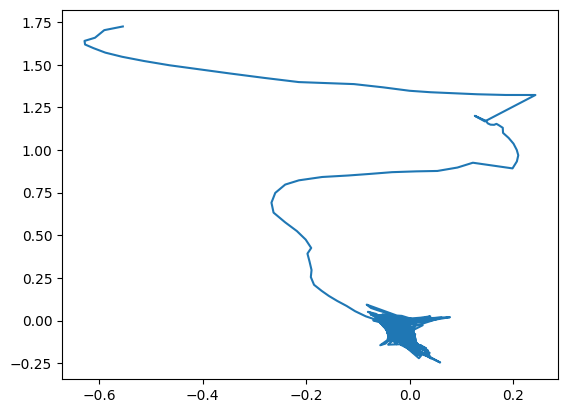

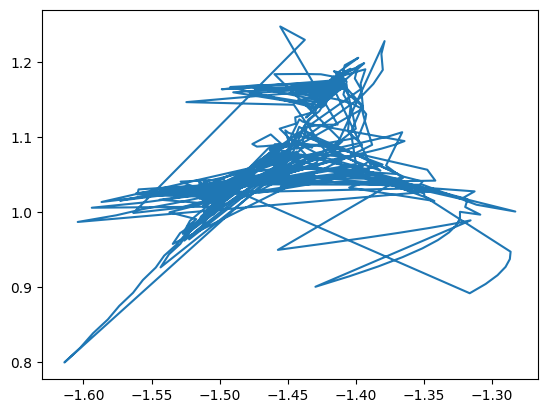

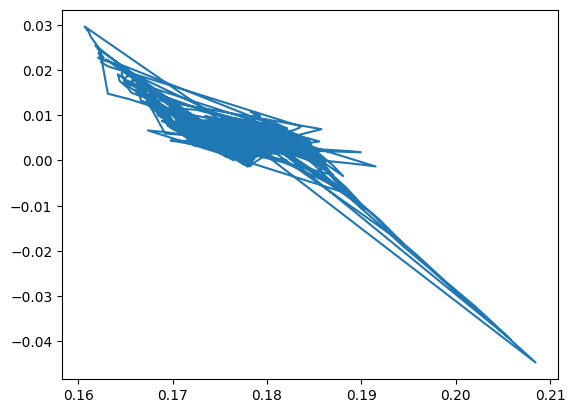

In [93]:
for sensor in sensor_dfs:
    plt.figure()
    plt.plot(sensor["x"], sensor["z"], label=sensor.index[0].capitalize() + " X-Z")

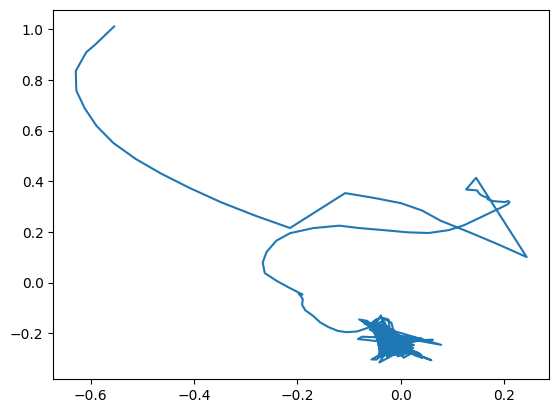

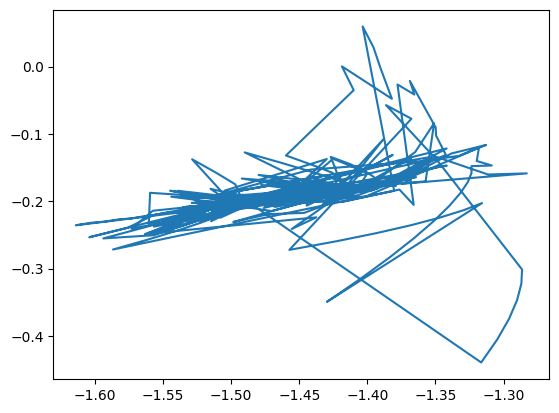

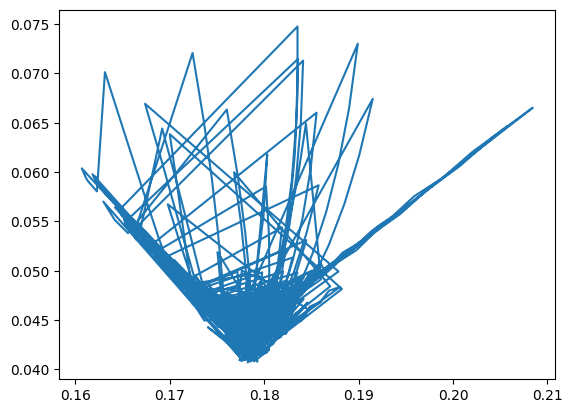

In [94]:
for sensor in sensor_dfs:
    plt.figure()
    plt.plot(sensor["x"], sensor["y"], label=sensor.index[0].capitalize() + " X-Y")

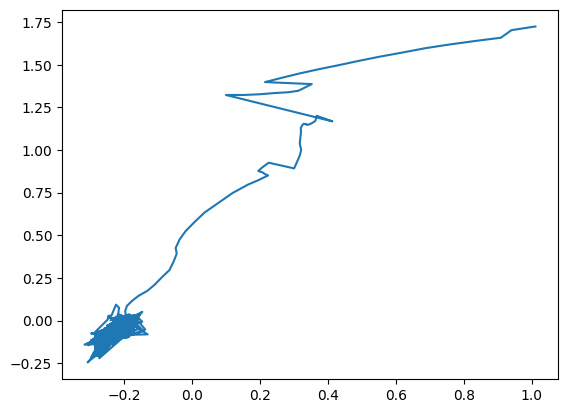

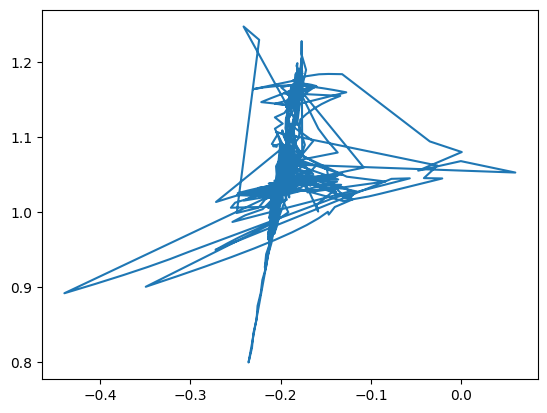

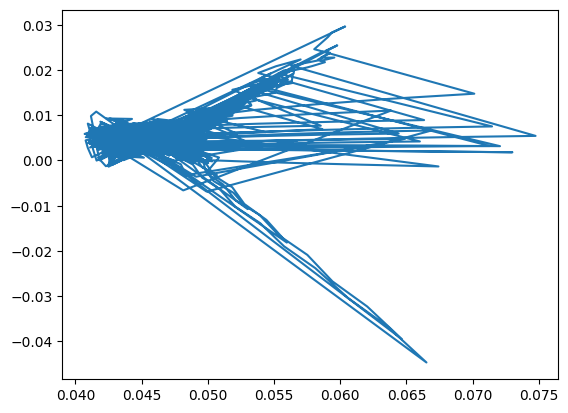

In [95]:
for sensor in sensor_dfs:
    plt.figure()
    plt.plot(sensor["y"], sensor["z"], label=sensor.index[0].capitalize() + " Y-Z")

Histogram for Back X
Histogram for Back Y
Histogram for Back Z
Histogram for Finger X
Histogram for Finger Y
Histogram for Finger Z
Histogram for Wrist X
Histogram for Wrist Y
Histogram for Wrist Z


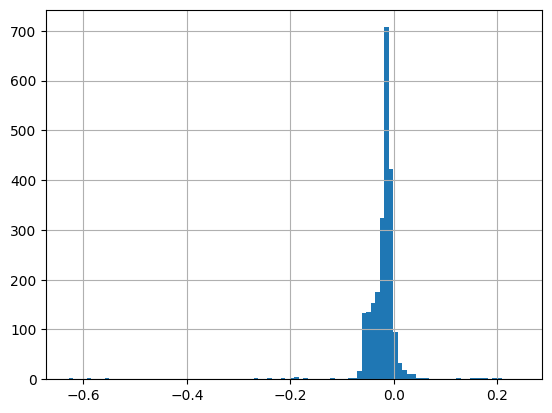

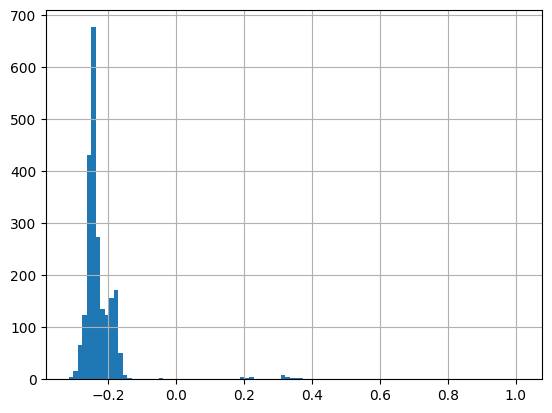

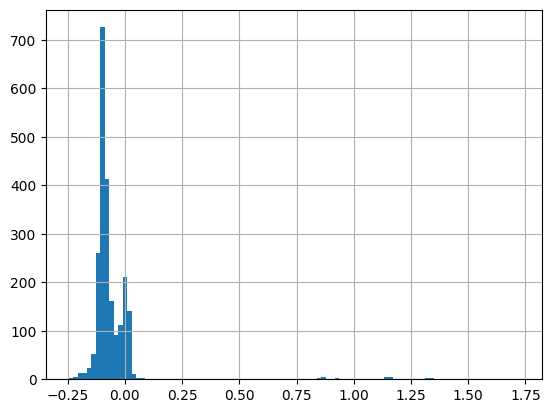

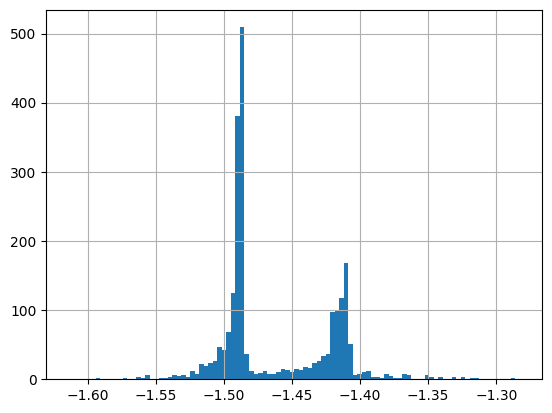

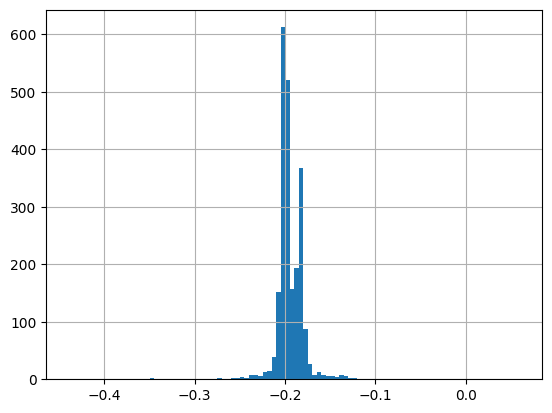

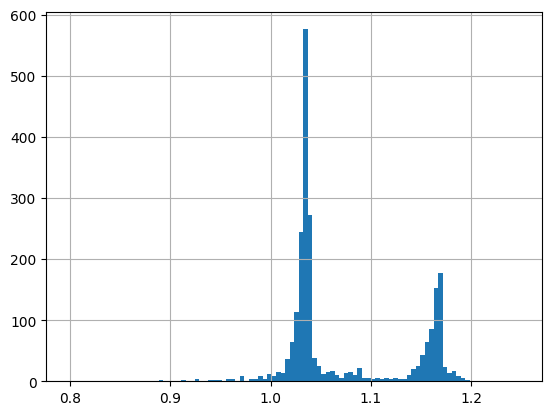

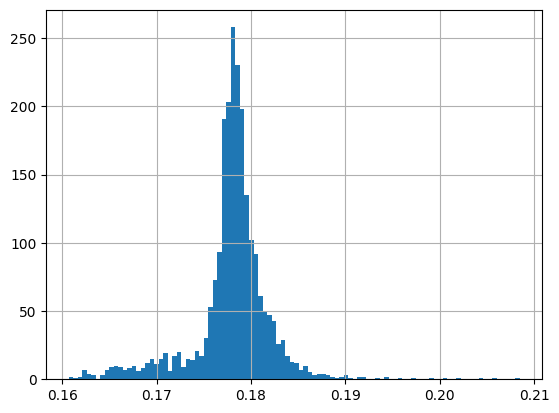

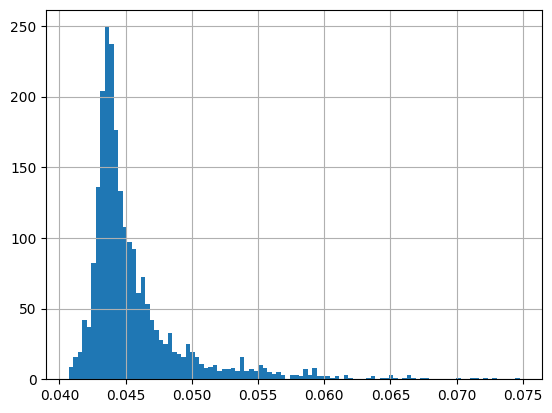

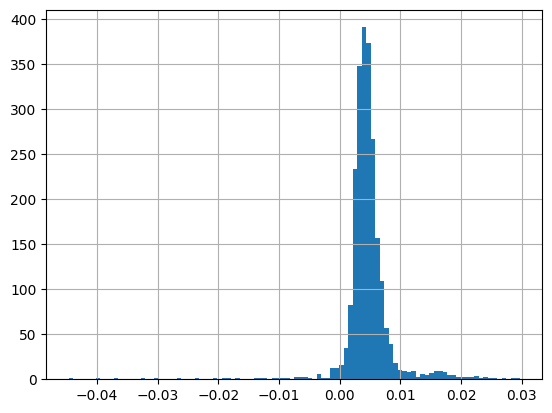

In [96]:
for sensor in sensor_dfs:
    plt.figure()    
    print("Histogram for", sensor.index[0].capitalize(), "X")
    sensor["x"].hist(bins=100)
    plt.figure()
    print("Histogram for", sensor.index[0].capitalize(), "Y")
    sensor["y"].hist(bins=100)
    plt.figure()
    print("Histogram for", sensor.index[0].capitalize(), "Z")
    sensor["z"].hist(bins=100)

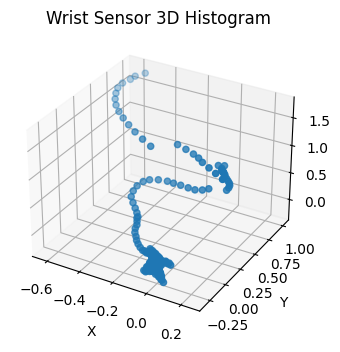

array([ 0.58639829,  0.00086074,  0.36197298, ...,  0.63231108,
       -0.85004942,  0.54572986])

In [19]:
# this code plots a 3d histogram of the x,y,z data from the wrist sensor

wrist_df = sensor_dfs[0]

from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = wrist_df["x"]
y = wrist_df["y"]
z = wrist_df["z"]
c = np.random.standard_normal(2302)
img = ax.scatter(x, y, z, cmap=plt.hot())
plt.title("Wrist Sensor 3D Histogram")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# fig.colorbar(img)
plt.show()
c

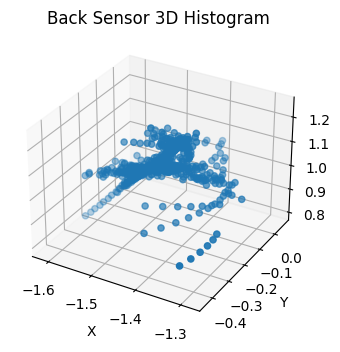

In [21]:
# this code plots a 3d histogram of the x,y,z data from the wrist sensor

back_df = sensor_dfs[1]

from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = back_df["x"]
y = back_df["y"]
z = back_df["z"]
c = np.random.standard_normal(2302)
img = ax.scatter(x, y, z, cmap=plt.hot())
plt.title("Back Sensor 3D Histogram")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# fig.colorbar(img)
plt.show()

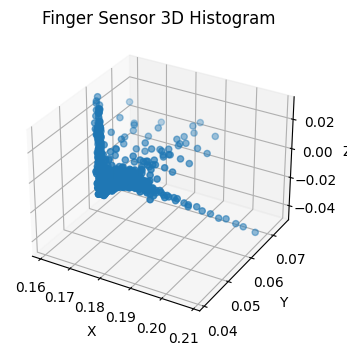

In [24]:
# this code plots a 3d histogram of the x,y,z data from the wrist sensor

finger_df = sensor_dfs[2]

from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = finger_df["x"]
y = finger_df["y"]
z = finger_df["z"]
c = np.random.standard_normal(2302)
img = ax.scatter(x, y, z, cmap=plt.hot())
plt.title("Finger Sensor 3D Histogram")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# fig.colorbar(img)
plt.show()

In [99]:
# This code is going to generate the covariance matrix for the data
# Path: crazyflie/analysis/measure_covariance.ipynb

for sensor in sensor_dfs:
    print(sensor.index[0].capitalize(), "sensor covariance matrix:")
    cov = sensor[["x","y","z"]].cov()
    print(cov)
    print(cov.values.tolist(), end="\n\n")
    print()

Back sensor covariance matrix:
          x         y         z
x  0.002486 -0.002308 -0.004002
y -0.002308  0.009568  0.018727
z -0.004002  0.018727  0.039994
[[0.002485859634095731, -0.002308135815051345, -0.004002306849713008], [-0.002308135815051345, 0.00956836542299711, 0.01872722843125719], [-0.004002306849713008, 0.01872722843125719, 0.03999354729200051]]


Finger sensor covariance matrix:
          x         y         z
x  0.001829  0.000425  0.001889
y  0.000425  0.000453  0.000581
z  0.001889  0.000581  0.003936
[[0.001828557326597358, 0.0004251514209846113, 0.001889001107369117], [0.0004251514209846113, 0.00045317913650282077, 0.0005813040838057882], [0.001889001107369117, 0.0005813040838057882, 0.003935928667193837]]


Wrist sensor covariance matrix:
          x         y         z
x  0.000018 -0.000003 -0.000014
y -0.000003  0.000016  0.000003
z -0.000014  0.000003  0.000017
[[1.7679614619001813e-05, -3.1666305124611222e-06, -1.3540933619792274e-05], [-3.1666305124611222e-0